In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *

#My image
image_path = "hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Image on dropbox
hel1_ave_path = '../Dropbox Files/hel1_ave_LF_Circ.tif'
hel1_ave_image = io.imread(hel1_ave_path)

#Testing avg_frame_arr function
file_path = '../Dropbox Files/hel1.pma'
avg_frame_data = avg_frame_arr(file_path)

#Chanel arrays
avg_frame_data_CH1 = avg_frame_data[:,:256]
avg_frame_data_CH2 = avg_frame_data[:,256:]

#Chanel image paths
CH1_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

#Chanel images
image_CH1 = io.imread(CH1_img_path, as_gray=True)
image_CH2 = io.imread(CH2_img_path, as_gray=True)

Image Size: 512 x 512
Sucessfully generated average frame


Number of peaks identified in CH1: 57
Number of peaks identified in CH2: 68


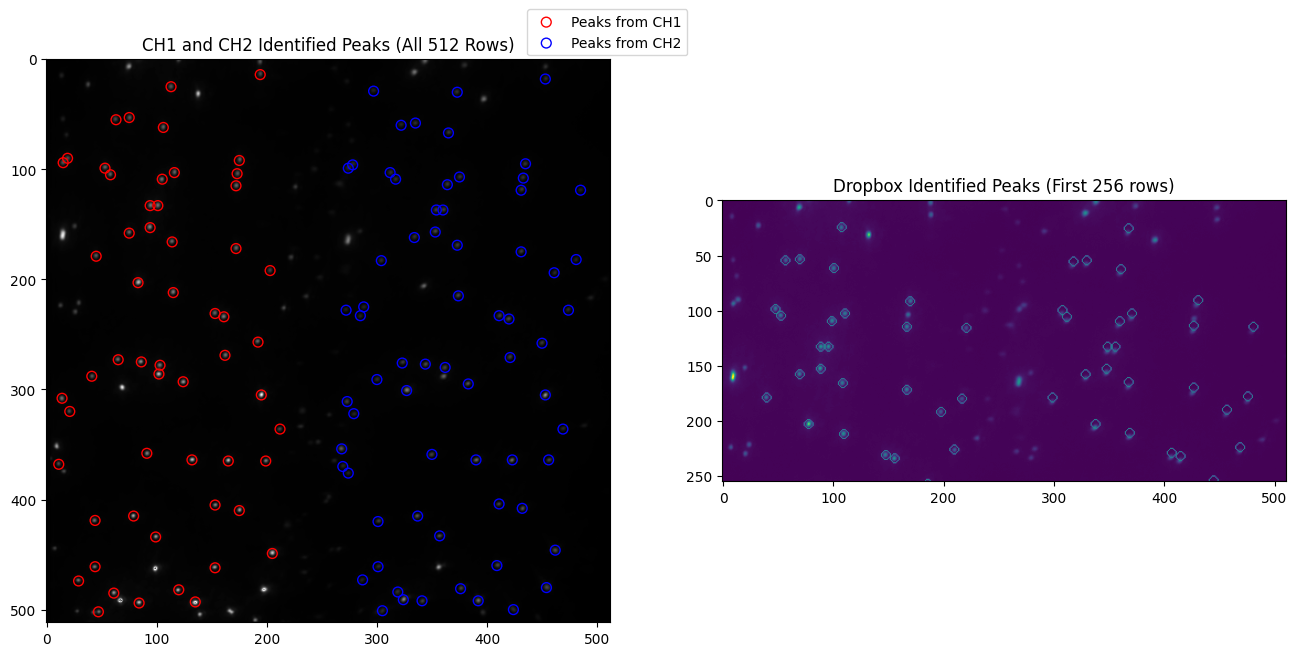

In [3]:
peaks_coords_IDL_CH1 = find_peaks_scipy_IDL(CH1_img_path)[0]
peaks_coords_IDL_CH2_new = find_peaks_scipy_IDL(CH2_img_path, sigma=2, block_size=16, scaler_percent=10)[0]

good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2_new,_ = good_peak_finder(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)

# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = shift_peaks(good_peaks_1)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

#All in one image!
print(f"Number of peaks identified in CH1: {len(good_peaks_1)}")
print(f"Number of peaks identified in CH2: {len(good_peaks_2_CH2)}")

f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].set_title("CH1 and CH2 Identified Peaks (All 512 Rows)")
axes[0].imshow(image, cmap="gray")
scat1= axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
scat2= axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))

axes[1].set_title("Dropbox Identified Peaks (First 256 rows)")
axes[1].imshow(hel1_ave_image)
plt.show()

# Mapping Function

# Find_linear_pairs gives a default 1 pixel leeway/tolerance in the x and y directions
#### This can be changed by changing the function argument, tolerance

In [4]:
# No Shift
linear_pair_count = find_linear_pairs(good_peaks_1, good_peaks_2_CH2)[0]
linear_pair_arr_CH1 = find_linear_pairs(good_peaks_1, good_peaks_2_CH2)[1]
linear_pair_arr_CH2 = find_linear_pairs(good_peaks_1, good_peaks_2_CH2)[2]

print(f"Number of linear pairs: {linear_pair_count}")
print(f"Linear pair CH1 coords:\n {linear_pair_arr_CH1}")

Number of linear pairs: 6
Linear pair CH1 coords:
 [[493 135]
 [482 120]
 [365 199]
 [461  44]
 [419  44]
 [336 212]]


In [5]:
# Shifting CH2 peaks 1 to the right [1, -1]
good_peaks_2_CH2_shift = shift_peaks(good_peaks_2_CH2, [1,-1])
linear_pair_count_shift,linear_pair_arr_CH1_shift, linear_pair_arr_CH2_shift = find_linear_pairs(good_peaks_1, good_peaks_2_CH2_shift)

print(f"Number of linear pairs: {linear_pair_count_shift}")
# print(f"Linear pair CH1 coords:\n {linear_pair_arr_CH1_shift}")

Number of linear pairs: 17


In [6]:
# print(f"Linear pair CH2 coords:\n {linear_pair_arr_CH2_shift}")

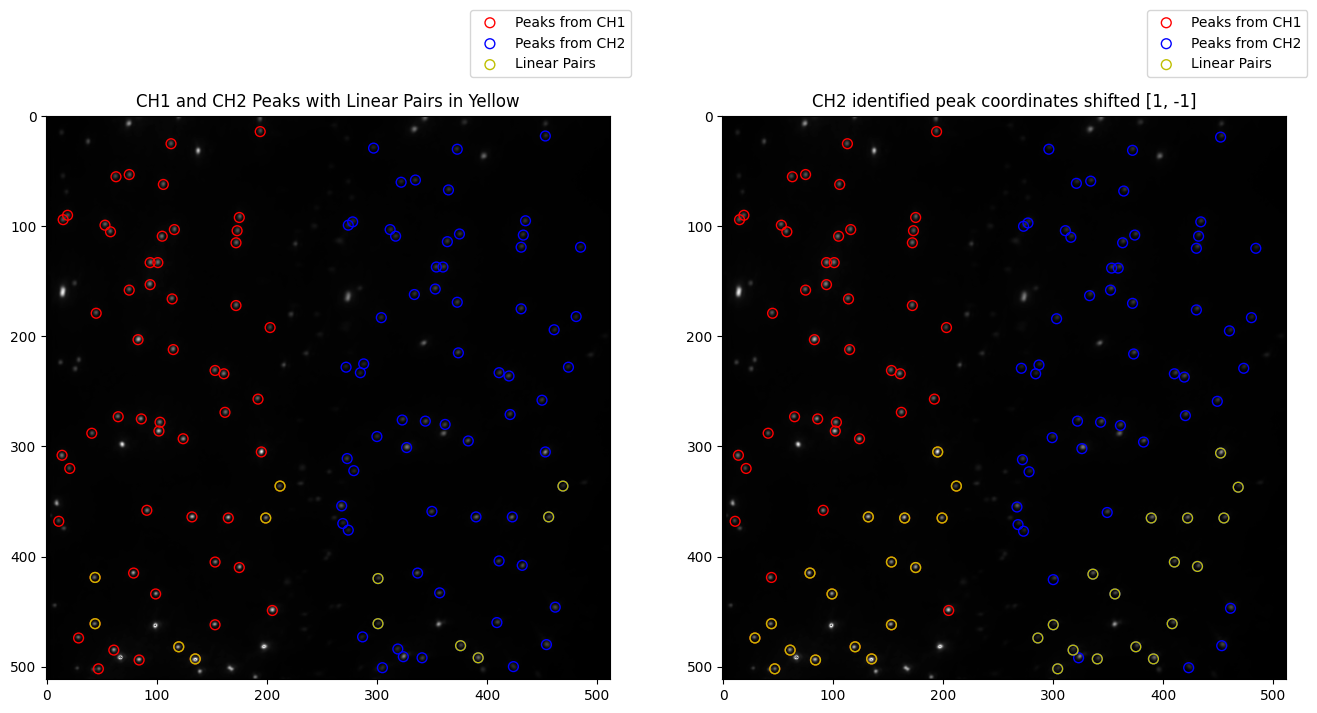

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 32))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("CH1 and CH2 Peaks with Linear Pairs in Yellow")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(linear_pair_arr_CH1[:, 1], linear_pair_arr_CH1[:, 0], s=50, facecolors='none', edgecolors='y', label='Linear Pairs')
axes[0].scatter(linear_pair_arr_CH2[:, 1], linear_pair_arr_CH2[:, 0], s=50, facecolors='none', edgecolors='y')   
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[1].imshow(image, cmap="gray")
axes[1].set_title("CH2 identified peak coordinates shifted [1, -1]")
axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[1].scatter(good_peaks_2_CH2_shift[:, 1], good_peaks_2_CH2_shift[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(linear_pair_arr_CH1_shift[:, 1], linear_pair_arr_CH1_shift[:, 0], s=50, facecolors='none', edgecolors='y', label='Linear Pairs')
axes[1].scatter(linear_pair_arr_CH2_shift[:, 1], linear_pair_arr_CH2_shift[:, 0], s=50, facecolors='none', edgecolors='y')   
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))    
plt.show()


# Testing find_linear_pairs with tolerance = 4 (as in IDL .txt file)
#### Bench mark is 17 peaks w/ CH2 shifted by [1, -1]
#### IDL uses a tolerance of 4 however smCamera uses a tolerance of 1

In [8]:
# Shifting CH2 peaks 1 to the right [1, -1]
linear_pair_count_shift_tol4= find_linear_pairs(good_peaks_1, good_peaks_2_CH2_shift, tolerance=4)[0]
linear_pair_arr_CH1_shift_tol4 = find_linear_pairs(good_peaks_1, good_peaks_2_CH2_shift, tolerance=4)[1]
linear_pair_arr_CH2_shift_tol4 = find_linear_pairs(good_peaks_1, good_peaks_2_CH2_shift, tolerance=4)[2]

print(f"Number of linear pairs: {linear_pair_count_shift_tol4}")
# print(f"Linear pair CH1 coords:\n {linear_pair_arr_CH1_shift_tol4}")

Number of linear pairs: 38


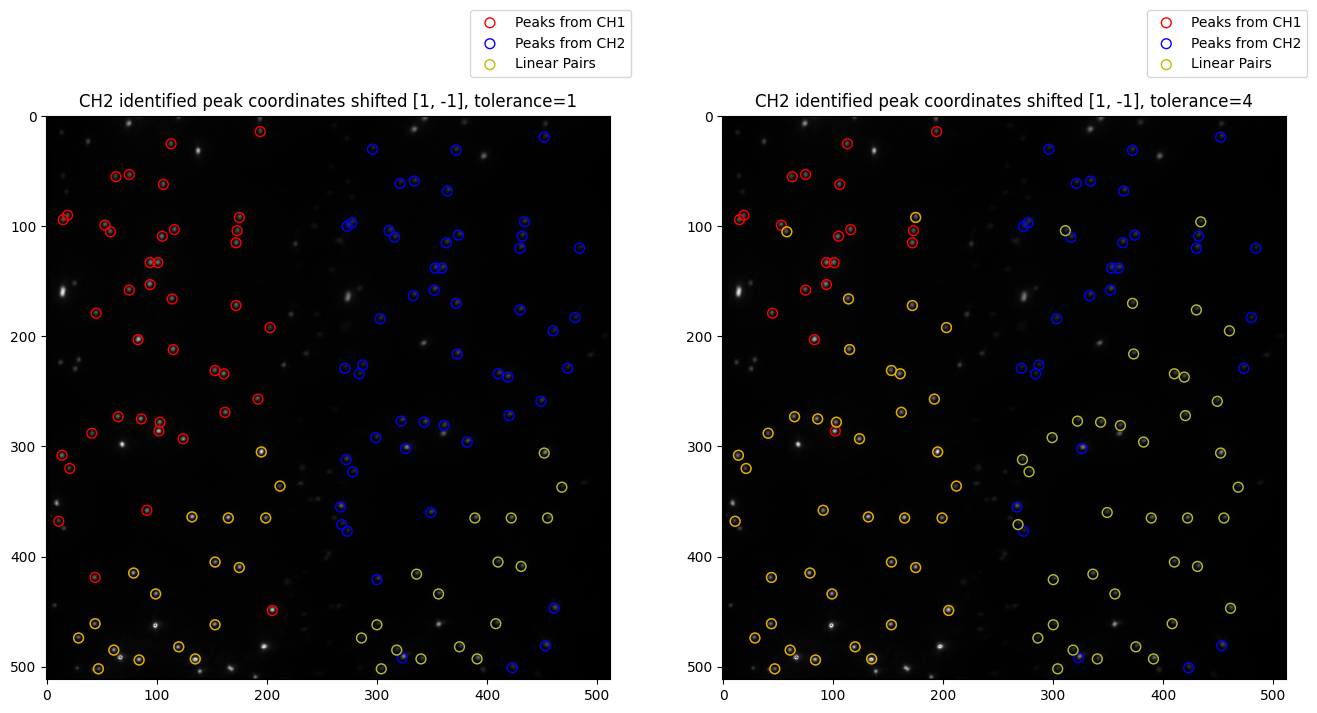

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 32))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("CH2 identified peak coordinates shifted [1, -1], tolerance=1")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].scatter(good_peaks_2_CH2_shift[:, 1], good_peaks_2_CH2_shift[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(linear_pair_arr_CH1_shift[:, 1], linear_pair_arr_CH1_shift[:, 0], s=50, facecolors='none', edgecolors='y', label='Linear Pairs')
axes[0].scatter(linear_pair_arr_CH2_shift[:, 1], linear_pair_arr_CH2_shift[:, 0], s=50, facecolors='none', edgecolors='y')   
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))  

axes[1].imshow(image, cmap="gray")
axes[1].set_title("CH2 identified peak coordinates shifted [1, -1], tolerance=4")
axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[1].scatter(good_peaks_2_CH2_shift[:, 1], good_peaks_2_CH2_shift[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(linear_pair_arr_CH1_shift_tol4[:, 1], linear_pair_arr_CH1_shift_tol4[:, 0], s=50, facecolors='none', edgecolors='y', label='Linear Pairs')
axes[1].scatter(linear_pair_arr_CH2_shift_tol4[:, 1], linear_pair_arr_CH2_shift_tol4[:, 0], s=50, facecolors='none', edgecolors='y')   
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))    
plt.show()
